<a href="https://colab.research.google.com/github/abazabaaa/colab_tutorial/blob/main/equibind_imatinib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
import sys
!pip -q install py3Dmol 2>&1 1>/dev/null
!pip install Cython

# install conda
!wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh 
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local 2>&1 1>/dev/null

In [2]:
!rm -r Miniconda3-latest-Linux-x86_64.sh
!conda install -y -q -c conda-forge python=3.7 pdbfixer 2>&1 1>/dev/null
!conda install -c conda-forge parmed  --yes 2>&1 1>/dev/null
!conda install -c bioconda pybel --yes
!conda install -c openbabel openbabel --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [3]:
!git clone https://github.com/rlabduke/reduce.git
!sudo make -C /content/reduce install
!git clone https://github.com/HannesStark/EquiBind


Cloning into 'reduce'...
remote: Enumerating objects: 2915, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 2915 (delta 248), reused 356 (delta 246), pack-reused 2538
Receiving objects: 100% (2915/2915), 27.23 MiB | 19.65 MiB/s, done.
Resolving deltas: 100% (2093/2093), done.
make: Entering directory '/content/reduce'
installing /toolclasses...
make[1]: Entering directory '/content/reduce/toolclasses'
g++ -O  -DCHARFUNCMACROS -DINCTEMPLATEDEFNS -DBOOLPREDEFINED -DBRACKETOPERPARMS -DLISTFRIENDFIX -c UseCount.cpp -o UseCount.o
g++ -O  -DCHARFUNCMACROS -DINCTEMPLATEDEFNS -DBOOLPREDEFINED -DBRACKETOPERPARMS -DLISTFRIENDFIX -c Point3d.cpp -o Point3d.o
g++ -O  -DCHARFUNCMACROS -DINCTEMPLATEDEFNS -DBOOLPREDEFINED -DBRACKETOPERPARMS -DLISTFRIENDFIX -c utility.cpp -o utility.o
g++ -O  -DCHARFUNCMACROS -DINCTEMPLATEDEFNS -DBOOLPREDEFINED -DBRACKETOPERPARMS -DLISTFRIENDFIX -c column_sprintf.cpp -o column_sprintf.o
g++ -O  -DCH

In [4]:
!pip install torch
!pip install torchvision
!pip install dgl-cu102
!pip install bio
!pip install biopandas
!pip install joblib
!pip install tensorboard
!pip install POT
!pip install pyaml
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 98.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 17.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#load dependencies
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import parmed as pmd
from biopandas.pdb import PandasPdb
import os
import urllib.request  
import numpy as np
import py3Dmol
from __future__ import print_function
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
import seaborn as sb
from statistics import mean, stdev
from matplotlib import colors
from IPython.display import set_matplotlib_formats

In [6]:
#@title **Check if you correctly allocated GPU nodes**

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Jul 17 16:48:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
#@title **Please, provide the necessary input files below for receptor**: 
#@markdown **Important:** Run the cell to prepare your receptor.

import warnings
warnings.filterwarnings('ignore')
import os
from Bio.PDB import PDBParser, PDBIO, Select
from Bio.PDB import is_aa
import pandas as pd
from pdbfixer import PDBFixer


# Google_Drive_Path = '/content/' #@param {type:"string"}
workDir = '/content/'

if os.path.exists(os.path.join(workDir, "name_residues_receptor.txt")):
  os.remove(os.path.join(workDir,"name_residues_receptor.txt"))
else:
  pass

receptor = os.path.join(workDir, "receptor.pdb")
ligand = os.path.join(workDir, "ligand.sdf")


Query_PDB_ID = '6hdh' #@param {type:"string"}

pdbfn = Query_PDB_ID + ".pdb"
url = 'https://files.rcsb.org/download/' + pdbfn
outfnm = os.path.join(workDir, pdbfn)
urllib.request.urlretrieve(url, outfnm)

#prepare receptor
ppdb = PandasPdb().read_pdb(outfnm)
ppdb.df['ATOM'] = ppdb.df['ATOM']
ppdb.df['HETATM'] = ppdb.df['HETATM'][ppdb.df['HETATM']['residue_name'] != 'HOH']
ppdb.df['ATOM'] = ppdb.df['ATOM'][ppdb.df['ATOM']['atom_name'] != 'OXT']
ppdb.to_pdb(path=receptor, records=['ATOM', 'HETATM'], gz=False, append_newline=True)

path = '/content/'

def is_het(residue):
    res = residue.id[0]
    return res != " " and res != "W"

def aa(residue):
    res = residue.id[0]
    return res != "W" 


class ResidueSelect(Select):
    def __init__(self, chain, residue):
        self.chain = chain
        self.residue = residue

    def accept_chain(self, chain):
        return chain.id == self.chain.id

    def accept_residue(self, residue):
        return residue == self.residue and aa(residue)

def extract_ligands(path):
    pdb = PDBParser().get_structure(receptor, receptor)
    io = PDBIO()
    io.set_structure(pdb)
    i2 = 1
    name_residues2 = []
    for model in pdb:
      for chain in model:
        for residue in chain:
          if not aa(residue):
            continue
          # print(f"{chain[i].resname} {i}")
          name_residues2.append(residue)
          print((f"saving {residue}"), file=open(os.path.join(workDir, "name_residues_receptor.txt"), "a",))
          i2 += 1

extract_ligands(path)


dataset2 = pd.read_csv(os.path.join(workDir, 'name_residues_receptor.txt'), delimiter = " ", header=None)
df2 = pd.DataFrame(dataset2)
df2 = df2.iloc[:, [2]]
new2 = df2.to_numpy()

if os.path.exists(receptor):
  print("Successfully generated the files! :-)")
else:
  print("ERROR: Check your inputs! ")

Successfully generated the files! :-)


In [8]:
!reduce -FLIP receptor.pdb >> receptor.pdb

Processing file: "receptor.pdb"
Building His ring NH Hydrogens.
Building or keeping OH & SH Hydrogens.
Rotating existing OH & SH Hydrogens
VDW dot density = 16/A^2
Probe radius = 0.25A
Orientation penalty scale = 1 (100%)
Eliminate contacts within 3 bonds.
Ignore atoms with |occupancy| <= 0.01 during adjustments.
Waters ignored if B-Factor >= 40 or |occupancy| < 0.66
Aromatic rings in amino acids accept hydrogen bonds.
Flipping Asn, Gln and His groups.
For each flip state, bumps where gap is more than 0.4A are indicated with '!'.
Rotating NH3 Hydrogens.
Not processing Met methyls.
 Singles(size 121): A   1 MET N   : A   3 LYS NZ  : A  14 THR OG1 : A  16 THR OG1 
  : A  19 TYR OH  : A  25 LYS NZ  : A  34 ASN     : A  39 GLN     : A  41 ASN     
  : A  43 GLN     : A  48 SER OG  : A  52 SER OG  : A  54 GLN     : A  55 LYS NZ  
  : A  62 LYS NZ  : A  63 LYS NZ  : A  65 SER OG  : A  70 LYS NZ  : A  74 LYS NZ  
  : A  77 ASN     : A  79 ASN     : A  80 TYR OH  : A  82 LYS NZ  : A  85 GLN   

In [9]:
#@title **Receptor Visualization**: 
#@markdown Now the protein has been sanitized, it would be recomended to visualize and check the protein.
import py3Dmol

view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

view.addModel(open(receptor,'r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

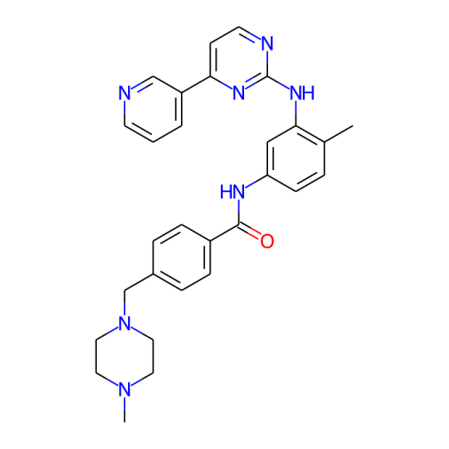

In [10]:
import requests
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem,Draw
import IPython
from IPython.display import Image
import pybel
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# from rdkit.Chem.Draw import IPythonConsole

#@title **Please, provide the necessary input files for the ligand**: 

#@markdown Type the name of your ligand. If you don't know the exactly name, please, check at https://pubchem.ncbi.nlm.nih.gov/
Name = 'IMATINIB' #@param {type:"string"}


def get_cids(text):
    """
    Search pubchem and return best matching record
    """  
    url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{}/cids/TXT'.format(text)
    response = requests.get(url)
    cids = response.text.split()
    if len(cids) == 0:
        return None
    else:
        return cids
def get_record(cid):
    """
    Get pubchem record for a given cid and returns molecule as rdkit
    """
    url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/record/SDF'.format(cid)
    response = requests.get(url)
    mol = Chem.MolFromMolBlock(response.text)
    smi = Draw.MolToFile(mol, size=(600, 600), filename=str(Name) + '.png')
    img = mpimg.imread(str(Name) + '.png')
    plt.figure(figsize = (8,8))
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    hmol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(hmol)
    # mol = copy.deepcopy(hmol)
    hmol.GetConformer(0)
    mp = AllChem.MMFFGetMoleculeProperties(hmol)
    ff = AllChem.MMFFGetMoleculeForceField(hmol, mp)
    # Optimize
    AllChem.OptimizeMoleculeConfs(hmol, ff, numThreads=1, maxIters=1000)
    AllChem.MolToMolFile(hmol, (os.path.join(workDir, "ligand.mol")))
    AllChem.MolToPDBFile(hmol, (os.path.join(workDir, "ligand.pdb")))
    mol= [m for m in pybel.readfile(filename=os.path.join(workDir, "ligand.mol"), format='mol')][0]
    out=pybel.Outputfile(filename=ligand,format='sdf',overwrite=True)
    out.write(mol)
    out.close()
  # return mol

def get_molecule(text, n_results=1):
    """
    Search pubchem and return best matching record
    """  
    cids = get_cids(text)
    if cids is None:
        return None
    else:
        if n_results == 1:
            return get_record(cids[0])
        else:
            return [get_record(cid) for cid in cids[:n_results]]

get_molecule(Name, n_results=1)

In [11]:
#@title **Ligand Visualization**: 
#@markdown Now the ligand has been sanitized, it would be recomended to visualize and check the ligand.

view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.05})

# view.addModel(open(receptor,'r').read(),format='pdb')
# Prot=view.getModel()
# Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'white'}})
# view.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})

view.addModel(open(ligand,'r').read(),format='mol2')
ref_m = view.getModel()
ref_m.setStyle({},{'stick':{'colorscheme':'greenCarbon','radius':0.2}})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
#@title **Parameters for the EquiBind calculation:**
Output_folder_name = 'final' #@param {type:"string"}

#@markdown Explicit random seed:
seed = "0" #@param {type:"string"}

docking_output = os.path.join(workDir, Output_folder_name)

# if os.path.exists(docking_output):
#   os.remove(docking_output)
# else:
#   pass

equibind = "python3 /content/EquiBind/multiligand_inference.py -o " + str(docking_output) + " -r /content/receptor.pdb -l /content/ligand.sdf --seed " + str(int(seed))

original_stdout = sys.stdout # Save a reference to the original standard output
with open('equibind.sh', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(equibind)
    sys.stdout = original_stdout # Reset the standard output to its original value

!chmod 700 equibind.sh 2>&1 1>/dev/null
!bash equibind.sh

import gzip
v = py3Dmol.view()
v.setViewStyle({'style':'outline','color':'black','width':0.05})
v.addModel(open(receptor).read())
v.setStyle({'cartoon':{},'stick':{'colorscheme':'white','radius':.1}})
# v.addModel(open(res_box).read())
# v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.175}})
v.addModelsAsFrames(open(os.path.join(workDir, Output_folder_name + "/output.sdf")).read())
v.setStyle({'model':1},{'stick':{'colorscheme':'greenCarbon'}})
v.zoomTo({'model':1})
v.rotate(90)

DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
Using backend: pytorch
[2022-07-17 16:49:04.448644] [ Using Seed :  0  ]
device = cuda:0
Entering batch ending in index 1/1


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol